In [ ]:
#versao2.py
#Imprime versao de Tensorflow, Keras e Keras dentro do Tensorflow
#Tambem imprime se GPU esta funcionando, versao de SO, CPU e RAM
import tensorflow as tf
import keras
import sys
import cv2
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
print(sys.version)
print("Versao de tensorflow:",tf.__version__)
print("Versao de Keras independente:",keras.__version__)
print("Versao de Keras dentro de tensorflow:",tf.keras.__version__)
print("Versao cv2:",cv2.__version__)
print()

gpu=tf.test.gpu_device_name()
if gpu=="":
  print("Computador sem GPU.")
else:
  print("Computador com GPU:",tf.test.gpu_device_name())
  from tensorflow.python.client import device_lib
  devices=device_lib.list_local_devices()
  print("Dispositivos:",[x.physical_device_desc for x in devices if x.physical_device_desc!=""])
print()

!lsb_release -a | grep "Description" #imprime qual é o sistema operacional
!echo

!cat /proc/cpuinfo | grep -E "model name|core" #especificações de CPU
!echo 

!cat /proc/meminfo  | grep "Mem" #especificações de RAM


3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]
Versao de tensorflow: 2.3.0
Versao de Keras independente: 2.4.3
Versao de Keras dentro de tensorflow: 2.4.0
Versao cv2: 4.1.2

Computador com GPU: /device:GPU:0
Dispositivos: ['device: XLA_CPU device', 'device: XLA_GPU device', 'device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5']

No LSB modules are available.
Description:	Ubuntu 18.04.5 LTS

model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
core id		: 0
cpu cores	: 1
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
core id		: 0
cpu cores	: 1

MemTotal:       13333552 kB
MemFree:         9518576 kB
MemAvailable:   11940784 kB


In [ ]:
%reset -f
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd '/content/drive/My Drive/EP Hae'


Mounted at /content/drive
/content/drive/My Drive/EP Hae


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

#treino
ax = []
ay = []
for i in range(100):
  if i+1 < 10:
    nome = '00'+str(i+1)
  elif i+1 <100:
    nome = '0'+str(i+1)
  else:
    nome = str(i+1)
  img = cv2.imread('imagens/'+nome+'bl.jpg',0)
  ax.append(img/256)
  bgr = cv2.imread('imagens/'+nome+'bc.jpg')
  lab=cv2.cvtColor(np.array(bgr, dtype=np.uint8),cv2.COLOR_BGR2LAB)
  laba=(lab[:,:,1]-42)/184
  labb=(lab[:,:,2]-20)/203
  lab = np.dstack((laba,labb))
  ay.append((lab))

  img = cv2.imread('imagens/'+nome+'al.jpg',0)
  ax.append(img/256)
  bgr = cv2.imread('imagens/'+nome+'ac.jpg')
  lab=cv2.cvtColor(bgr,cv2.COLOR_BGR2LAB)
  laba=(lab[:,:,1]-42)/184
  labb=(lab[:,:,2]-20)/203
  lab = np.dstack((laba,labb))
  ay.append((lab))


ax = np.array(ax).reshape(200, 384, 256, 1) 
ay = np.array(ay).reshape(200, 384, 256, 2)

#validação
vx = []
vy = []
for i in range(101,151):
  nome=str(i)
  img = cv2.imread('imagens/'+nome+'bl.jpg',0)
  vx.append(img/256)
  bgr = cv2.imread('imagens/'+nome+'bc.jpg')
  lab=cv2.cvtColor(np.array(bgr, dtype=np.uint8),cv2.COLOR_BGR2LAB)
  laba=(lab[:,:,1]-42)/184
  labb=(lab[:,:,2]-20)/203
  lab = np.dstack((laba,labb))
  vy.append((lab))


  img = cv2.imread('imagens/'+nome+'al.jpg',0)
  vx.append(img/256)
  bgr = cv2.imread('imagens/'+nome+'ac.jpg')
  lab=cv2.cvtColor(np.array(bgr, dtype=np.uint8),cv2.COLOR_BGR2LAB)
  laba=(lab[:,:,1]-42)/184
  labb=(lab[:,:,2]-20)/203
  lab = np.dstack((laba,labb))
  vy.append((lab))

#teste
vx = np.array(vx).reshape(100, 384, 256, 1) 
vy = np.array(vy).reshape(100, 384, 256, 2)


qx = []
qy = []
for i in range(151,201):
  nome=str(i)
  img = cv2.imread('imagens/'+nome+'bl.jpg',0)
  qx.append(img/256)
  bgr = cv2.imread('imagens/'+nome+'bc.jpg')
  lab=cv2.cvtColor(np.array(bgr, dtype=np.uint8),cv2.COLOR_BGR2LAB)
  laba=(lab[:,:,1]-42)/184
  labb=(lab[:,:,2]-20)/203
  lab = np.dstack((laba,labb))
  qy.append((lab))


  img = cv2.imread('imagens/'+nome+'al.jpg',0)
  qx.append(img/256)
  bgr = cv2.imread('imagens/'+nome+'ac.jpg')
  lab=cv2.cvtColor(np.array(bgr, dtype=np.uint8),cv2.COLOR_BGR2LAB)
  laba=(lab[:,:,1]-42)/184
  labb=(lab[:,:,2]-20)/203
  lab = np.dstack((laba,labb))
  qy.append((lab))


qx = np.array(qx).reshape(100, 384, 256, 1) 
qy = np.array(qy).reshape(100, 384, 256, 2)

In [ ]:
import cv2;
import numpy as np; np.random.seed(7);
import os;
import sys;
import tensorflow.keras as keras
import keras.backend as K;
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'


def unet(input_size = (384,256,1)):
  inputs = Input(input_size) 
  conv2 = Conv2D(32, (3,3), activation = 'relu', padding = 'same' )(inputs)
  conv2 = Conv2D(32, (3,3), activation = 'relu', padding = 'same' )(conv2)
  pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)  
  conv3 = Conv2D(64, (3,3), activation = 'relu', padding = 'same' )(pool2)
  conv3 = Conv2D(64, (3,3), activation = 'relu', padding = 'same' )(conv3)
  pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)  
  conv4 = Conv2D(128, (3,3), activation = 'relu', padding = 'same' )(pool3)
  conv4 = Conv2D(128, (3,3), activation = 'relu', padding = 'same' )(conv4)
  drop4 = Dropout(0.5)(conv4) 
  pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)  

  conv5 = Conv2D(256, (3,3), activation = 'relu', padding = 'same' )(pool4)
  conv5 = Conv2D(256, (3,3), activation = 'relu', padding = 'same' )(conv5)
  drop5 = Dropout(0.5)(conv5)   

  up6 = Conv2D(128, (2,2), activation = 'relu', padding = 'same'
              )(UpSampling2D(size = (2,2))(drop5)) 
  merge6 = concatenate([drop4,up6], axis = 3)
  conv6 = Conv2D(128, (3,3), activation = 'relu', padding = 'same' )(merge6)
  conv6 = Conv2D(128, (3,3), activation = 'relu', padding = 'same' )(conv6)

  up7 = Conv2D(64, (2,2), activation = 'relu', padding = 'same'
              )(UpSampling2D(size = (2,2))(conv6)) 
  merge7 = concatenate([conv3,up7], axis = 3)
  conv7 = Conv2D(64, (3,3), activation = 'relu', padding = 'same' )(merge7)
  conv7 = Conv2D(64, (3,3), activation = 'relu', padding = 'same' )(conv7)

  up8 = Conv2D(64, (2,2), activation = 'relu', padding = 'same'
              )(UpSampling2D(size = (2,2))(conv7)) 
  merge8 = concatenate([conv2,up8], axis = 3)
  conv8 = Conv2D(64, (3,3), activation = 'relu', padding = 'same' )(merge8)
  conv8 = Conv2D(64, (3,3), activation = 'relu', padding = 'same' )(conv8)

  conv8 = Conv2D(64, 3, activation = 'relu', padding = 'same' )(conv8)

  conv9 = Conv2D(2, 1, activation = 'sigmoid', padding = 'same' ,
          bias_initializer=keras.initializers.Constant(value=1.5))(conv8)

  model = Model(inputs = inputs, outputs = conv9)

  model.compile(optimizer = Adam(lr = 1e-3),
    loss = 'mean_squared_error')

  model.summary()
  return model

model = unet();

model.fit(ax,ay, epochs=100, verbose=2, validation_data=(vx,vy))

model.evaluate(qx,qy)

model.save('psi3472_2.h5')

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 384, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 384, 256, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 384, 256, 32) 9248        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 192, 128, 32) 0           conv2d_1[0][0]                   
_______________________________________________________________________________________

In [ ]:
#Encoder
import cv2;
import numpy as np; np.random.seed(7);
import os;
import sys;
import tensorflow.keras as keras
import keras.backend as K;
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
encoder_input = Input(shape=(384, 256, 1,))
encoder_output = Conv2D(64, (3,3), activation='relu', padding='same', strides=2)(encoder_input)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)#Decoder
decoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(2, (3, 3), activation='tanh', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
model2 = Model(inputs=encoder_input, outputs=decoder_output)

model2.summary()

model2.compile(optimizer = Adam(lr=1e-3), loss='mse' )
model2.fit(ax,ay, epochs=100 , validation_data=(vx,vy))

model2.evaluate(qx,qy)

model2.save('psi3472_5.h5')

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 384, 256, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 192, 128, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 192, 128, 128)     73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 64, 128)       147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 64, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 32, 256)       590080    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 48, 32, 512)      

In [1]:
from sklearn.metrics import mean_squared_error
from tensorflow import keras


model0 = keras.models.load_model('psi3472.h5')
model1 = keras.models.load_model('psi3472_1.h5')
model2 = keras.models.load_model('psi3472_2.h5')
model3 = keras.models.load_model('psi3472_3.h5')
model4 = keras.models.load_model('psi3472_4.h5')
model5 = keras.models.load_model('psi3472_5.h5')


ay0 = model0.predict(ax)
ay1 = model1.predict(ax)
ay2 = model2.predict(ax)
ay3 = model3.predict(ax)
ay4 = model4.predict(ax)
ay5 = model5.predict(ax)

aypredict = (ay0+ay1+ay2+ay3+ay4+ay5)/6
eval = np.square(np.subtract(ay,aypredict)).mean()

print("mean squared error for train: " + str(eval))



vy0 = model0.predict(vx)
vy1 = model1.predict(vx)
vy2 = model2.predict(vx)
vy3 = model3.predict(vx)
vy4 = model4.predict(vx)
vy5 = model5.predict(vx)

vypredict = (vy0+vy1+vy2+vy3+vy4+vy5)/6
eval = np.square(np.subtract(vy,vypredict)).mean()

print("mean squared error for validation: " + str(eval))




OSError: ignored

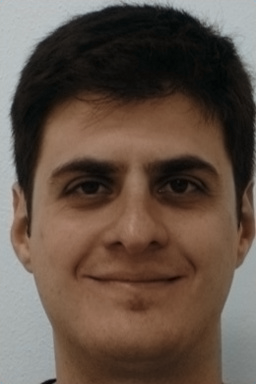

In [6]:
bgr = cv2.imread('imagens/001bc.jpg')
lab=cv2.cvtColor(np.array(bgr, dtype=np.uint8),cv2.COLOR_BGR2LAB)


laba=(aypredict[0,:,:,0])*184+42
labb=(aypredict[0,:,:,1])*203+20



b = ax[0]*255
d = np.dstack((b,laba,labb))
img = np.array(d, dtype=np.uint8)

e = cv2.cvtColor(img,cv2.COLOR_LAB2BGR)

cv2_imshow(e)